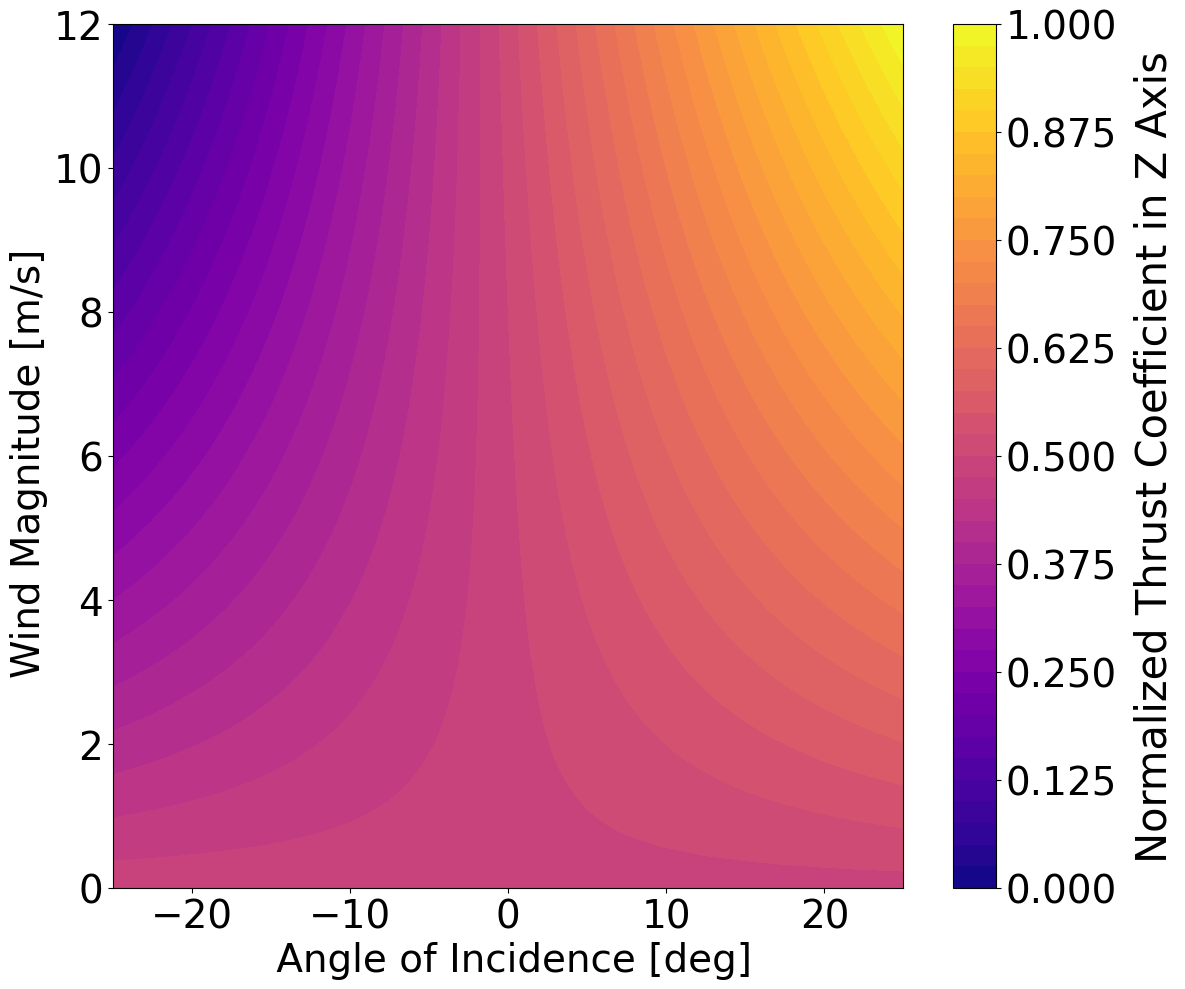

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Read the CSV file
df = pd.read_csv('rpm_wind_simulation_results_correct_2.csv')

# Set constants
n = 45
D = 2.809 * 2  # Diameter in meters
rho = 1.07178  # Air density (kg/m³)

# Calculate CQz
df['Fz'] = df['Fz'] / (rho * n**2 * D**4)

# Extract data for plotting
angles = df['AngleDegrees'].values
wind_mag = df['WindMagnitude'].values
cqz = df['Fz'].values

# Normalize CQz to range [0, 1]
cqz_min = cqz.min()
cqz_max = cqz.max()
cqz_normalized = (cqz - cqz_min) / (cqz_max - cqz_min)

# Create regular grid for interpolation
angle_range = np.linspace(angles.min(), angles.max(), 100)
wind_range = np.linspace(wind_mag.min(), wind_mag.max(), 100)
angle_grid, wind_grid = np.meshgrid(angle_range, wind_range)

# Interpolate normalized values
cqz_grid = griddata((angles, wind_mag), cqz_normalized, (angle_grid, wind_grid), method='cubic')

# Create filled contour plot
plt.figure(figsize=(12, 10))
cp = plt.contourf(angle_grid, wind_grid, cqz_grid, levels=40, cmap='plasma')

# Colorbar with larger label and tick size - using proper subscript notation
cbar = plt.colorbar(cp)
cbar.set_label('Normalized Thrust Coefficient in Z Axis', fontsize=30, labelpad=12)
cbar.ax.tick_params(labelsize=28)

# Axis labels and ticks
plt.xlabel(' Angle of Incidence [deg]', fontsize=28)
plt.ylabel('Wind Magnitude [m/s] ', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

# Improve layout
plt.tight_layout()
plt.show()

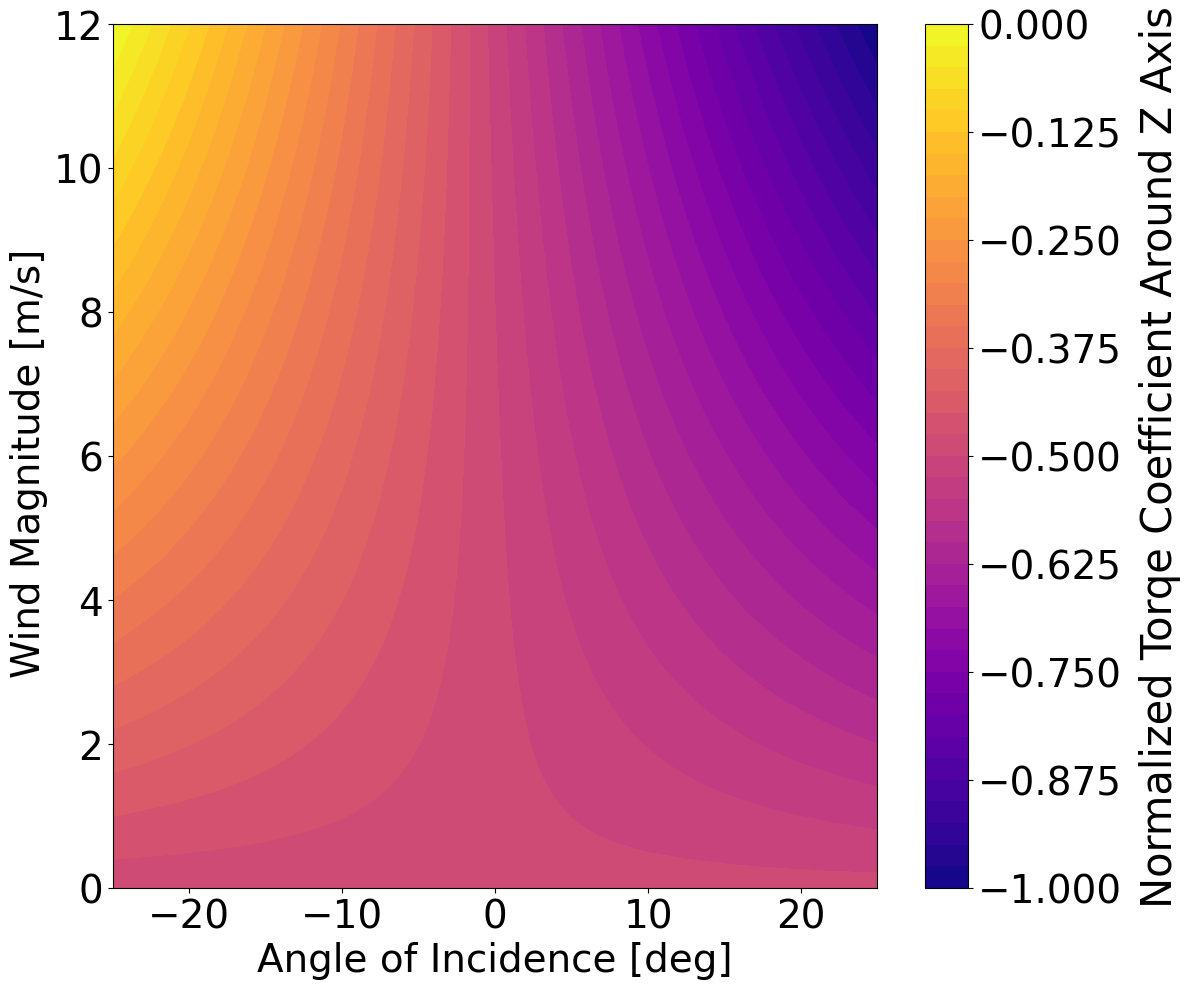

=== Data Summary ===
Original Qz range: -0.000151 to -0.000078
Normalized CQz range: -1.000000 to 0.000000
Angle range: -25.0 to 25.0 degrees
Wind magnitude range: 0.0 to 12.0 m/s


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Read the CSV file
df = pd.read_csv('rpm_wind_simulation_results_correct_2.csv')

# Set constants
n = 45
D = 2.809 * 2  # Diameter in meters
rho = 1.07178  # Air density (kg/m³)

# Calculate CQz
df['Qz'] = df['Qz'] / (rho * n**2 * D**5)

# Extract data for plotting
angles = df['AngleDegrees'].values
wind_mag = df['WindMagnitude'].values
cqz = df['Qz'].values

# Normalize CQz to range [-1, 1]
cqz_min = cqz.min()
cqz_max = cqz.max()
cqz_normalized = (cqz - cqz_max) / (cqz_max - cqz_min)

# Create regular grid for interpolation
angle_range = np.linspace(angles.min(), angles.max(), 100)
wind_range = np.linspace(wind_mag.min(), wind_mag.max(), 100)
angle_grid, wind_grid = np.meshgrid(angle_range, wind_range)

# Interpolate normalized values
cqz_grid = griddata((angles, wind_mag), cqz_normalized, (angle_grid, wind_grid), method='cubic')

# Create filled contour plot
plt.figure(figsize=(12, 10))
cp = plt.contourf(angle_grid, wind_grid, cqz_grid, levels=40, cmap='plasma')  # Using RdBu_r colormap for better visualization of -1 to 1 range

# Colorbar with larger label and tick size - using proper subscript notation
cbar = plt.colorbar(cp)
cbar.set_label('Normalized Torqe Coefficient Around Z Axis', fontsize=30, labelpad=12)
cbar.ax.tick_params(labelsize=28)

# Axis labels and ticks
plt.xlabel('Angle of Incidence [deg]', fontsize=28)
plt.ylabel('Wind Magnitude [m/s] ', fontsize=28)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)

# Add horizontal line at y=0 for reference (if needed)
# plt.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=1)

# Improve layout
plt.tight_layout()
plt.show()

# Print data range for verification
print("=== Data Summary ===")
print(f"Original Qz range: {df['Qz'].min():.6f} to {df['Qz'].max():.6f}")
print(f"Normalized CQz range: {cqz_normalized.min():.6f} to {cqz_normalized.max():.6f}")
print(f"Angle range: {angles.min():.1f} to {angles.max():.1f} degrees")
print(f"Wind magnitude range: {wind_mag.min():.1f} to {wind_mag.max():.1f} m/s")

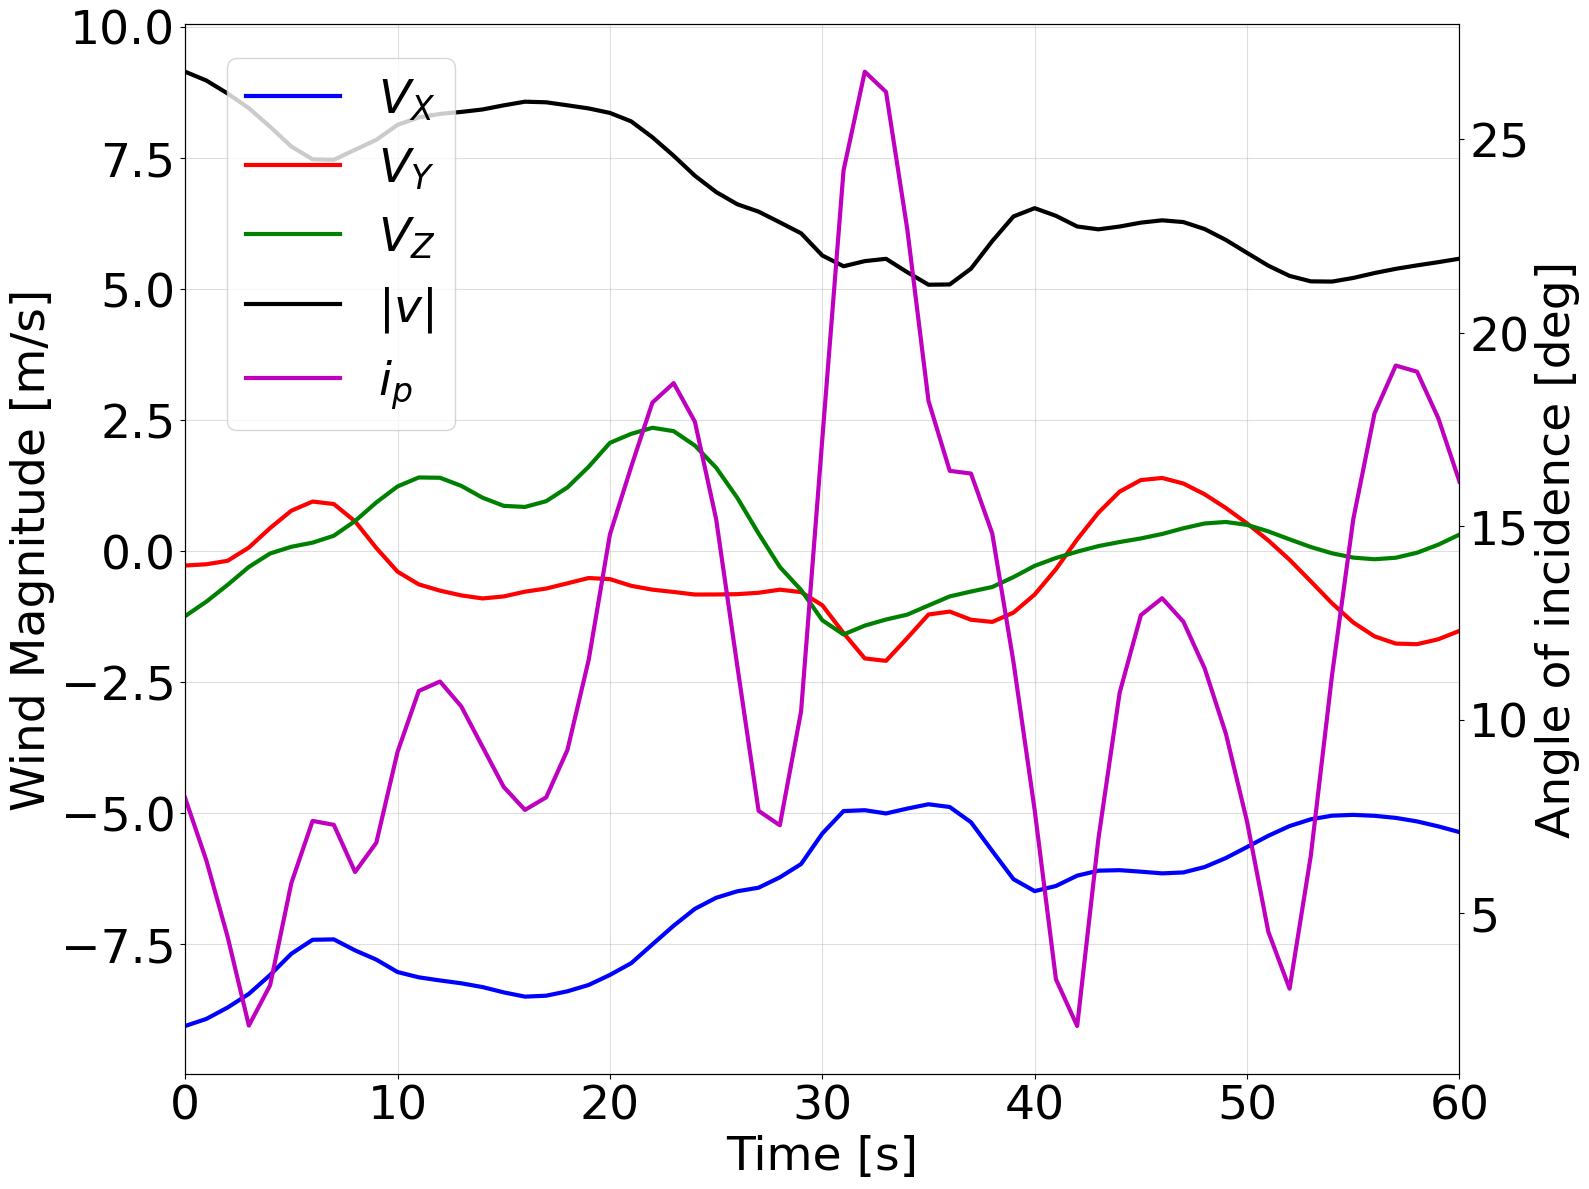

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('wind_velocities.csv')

# Calculate magnitude
df['wind_magnitude'] = np.sqrt(df['wind_velocity_x']**2 +
                              df['wind_velocity_y']**2 +
                              df['wind_velocity_z']**2)

# Calculate angle of attack (alpha)
df['alpha_rad'] = np.arccos(np.clip(np.abs(df['wind_velocity_x']) / df['wind_magnitude'], -1, 1))
df['alpha_deg'] = np.degrees(df['alpha_rad'])

# Filter data to focus on the 150-450m range
mask = (df['x_position'] >= 150) & (df['x_position'] <= 450)
df_filtered = df[mask].copy()

# Transform x_position: 150m -> 0, 450m -> 60
# This creates a linear transformation: (x-150) * 60/300 = (x-150) * 0.2
x_scaled = (df_filtered['x_position'] - 150) * (60 / 300)

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(16, 12))

# Plot velocity components on the primary axis with classic colors
ax1.plot(x_scaled, df_filtered['wind_velocity_x'], 'b-', label=r'$V_X$', linewidth=3)  # Blue
ax1.plot(x_scaled, df_filtered['wind_velocity_y'], 'r-', label=r'$V_Y$', linewidth=3)  # Red
ax1.plot(x_scaled, df_filtered['wind_velocity_z'], 'g-', label=r'$V_Z$', linewidth=3)  # Green
ax1.plot(x_scaled, df_filtered['wind_magnitude'], 'k-', label=r'$|v|$', linewidth=3)  # Black

# Set strict limits on x-axis
ax1.set_xlim(0, 60)
ax1.set_xlabel('Time [s]', fontsize=34)
ax1.set_ylabel('Wind Magnitude [m/s]', fontsize=34)
ax1.tick_params(axis='both', labelsize=34)

# Create secondary y-axis for angle of attack
ax2 = ax1.twinx()
ax2.plot(x_scaled, df_filtered['alpha_deg'], 'm', label=r'$i_p$', linewidth=3)  # Magenta
ax2.set_ylabel('Angle of incidence [deg]', fontsize=34, color='black')
ax2.tick_params(axis='y', labelsize=34, colors='black')

# Set the same x-limits for the secondary axis
ax2.set_xlim(0, 60)

# Combine legends with single column, positioned in upper right corner with padding
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, fontsize=34,
          loc='upper right', bbox_to_anchor=(0.23, 0.99))

# Add grid
ax1.grid(True, alpha=0.4)

# Improve layout
plt.tight_layout()
plt.show()

# Save the figure if needed
# plt.savefig('wind_velocities_plot.png', dpi=300, bbox_inches='tight')

t=1.0s: I=63.22A, V=363.99V, Ω=41.5627rad/s, Q_aero=-1340.3Nm, Q_motor=547.0Nm
t=2.0s: I=113.06A, V=349.95V, Ω=39.6588rad/s, Q_aero=-1356.7Nm, Q_motor=980.0Nm
t=3.0s: I=151.06A, V=346.00V, Ω=38.9845rad/s, Q_aero=-1367.6Nm, Q_motor=1310.3Nm
t=4.0s: I=176.95A, V=349.20V, Ω=39.2045rad/s, Q_aero=-1369.7Nm, Q_motor=1535.5Nm
t=5.0s: I=191.71A, V=356.89V, Ω=40.0056rad/s, Q_aero=-1365.4Nm, Q_motor=1663.9Nm
t=6.0s: I=197.25A, V=366.76V, Ω=41.1110rad/s, Q_aero=-1362.3Nm, Q_motor=1712.3Nm
t=7.0s: I=196.15A, V=376.89V, Ω=42.2852rad/s, Q_aero=-1370.7Nm, Q_motor=1702.9Nm
t=8.0s: I=191.36A, V=385.81V, Ω=43.3395rad/s, Q_aero=-1395.6Nm, Q_motor=1661.4Nm
t=9.0s: I=185.59A, V=392.58V, Ω=44.1527rad/s, Q_aero=-1426.7Nm, Q_motor=1611.3Nm
t=10.0s: I=180.43A, V=397.07V, Ω=44.6995rad/s, Q_aero=-1453.0Nm, Q_motor=1566.5Nm
t=11.0s: I=176.42A, V=399.67V, Ω=45.0225rad/s, Q_aero=-1469.3Nm, Q_motor=1531.7Nm
t=12.0s: I=173.50A, V=400.97V, Ω=45.1886rad/s, Q_aero=-1475.2Nm, Q_motor=1506.3Nm
t=13.0s: I=171.35A, V=401.48

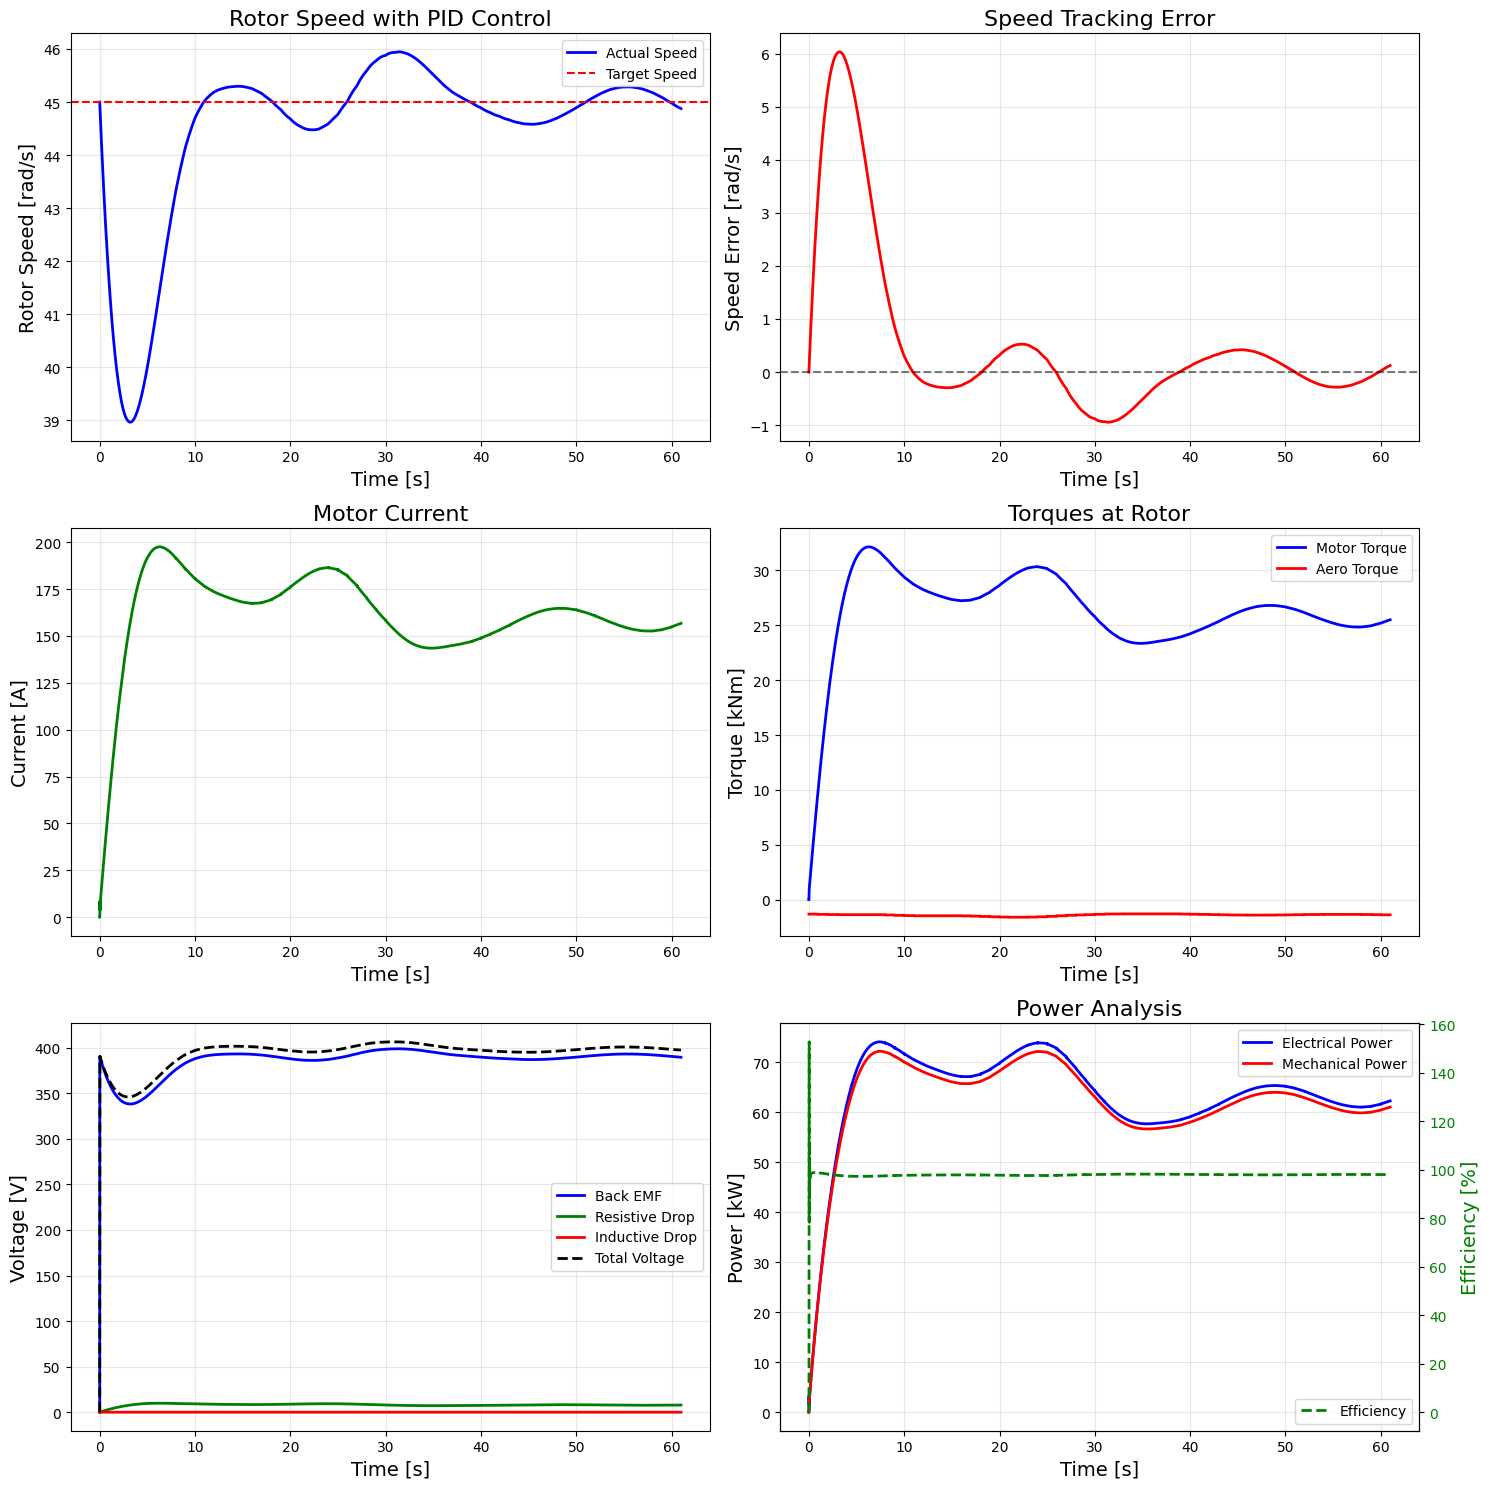

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load torque data ===
torque_df = pd.read_csv('torque_data.csv')
torque_z = torque_df['torque_z'].values  # Q_aero values at 1 Hz

# === Simulation Setup ===
dt = 0.01
steps_per_second = int(1 / dt)
sim_time = len(torque_z)
n_steps = sim_time * steps_per_second
time_array = np.arange(0, sim_time, dt)

# === Expand Q_aero for full time resolution ===
Q_aero_full = np.repeat(torque_z, steps_per_second)[:n_steps]

# === Constants ===
J_rot = 0.064         # kg·m²
I_r = 274.69          # kg·m²
r = 18.75             # Gear ratio
L = 0.3e-3            # H
R = 0.05              # Ohm
K_Q = 0.463           # Nm/A
K_V = 0.463           # V·s/rad
total_inertia = J_rot * r**2 + I_r

# === Desired Rotor Speed ===
Omega_desired = 45.0  # rad/s

# === Initialize states ===
Omega = np.zeros(n_steps)
omega = np.zeros(n_steps)
i_vals = np.zeros(n_steps)
v_vals = np.zeros(n_steps)
Q_m_vals = np.zeros(n_steps)
v_m_vals = np.zeros(n_steps)
Omega[0] = 45.0  # Initialize rotor speed to 45 rad/s

# === Control Gains ===
Kp = 15.0     # Proportional gain
Ki = 5.0      # Integral gain
Kd = 1.0      # Derivative gain
integral_error = 0  # Initialize integral term
previous_error = 0.0  # Initialize previous error for derivative term

# === Simulation Loop ===
for t in range(1, n_steps):
    # Feedback: rotor speed error
    error = Omega_desired - Omega[t - 1]
    
    # Update integral term
    integral_error += error * dt
    
    # Anti-windup: limit integral term
    integral_error = np.clip(integral_error, -50, 50)
    
    # Derivative term (difference of current error and previous error)
    derivative_error = (error - previous_error) / dt
    
    # PID controller to compute desired current
    i_desired = Kp * error + Ki * integral_error + Kd * derivative_error
    
    # Total desired current (no feedforward)
    i_total = i_desired
    
    # Limit current (optional safety)
    i_total = np.clip(i_total, -300, 300)
    
    # Motor torque from current
    Q_m = r * i_total * K_Q
    
    # Rotor dynamics
    dOmega_dt = (Q_m + Q_aero_full[t]) / total_inertia
    Omega[t] = Omega[t - 1] + dOmega_dt * dt
    
    # Motor shaft speed
    omega[t] = r * Omega[t]
    
    # Electrical dynamics (first-order response)
    tau_e = L/R  # Electrical time constant
    di_dt = (i_total - i_vals[t - 1]) / tau_e
    i_vals[t] = i_vals[t - 1] + di_dt * dt
    
    # Back EMF and voltage
    v_m = omega[t] * K_V
    v = v_m + i_vals[t] * R
    
    # For plotting: include inductive term
    v_inductive = L * (i_vals[t] - i_vals[t-1]) / dt
    v_total = v_m + i_vals[t] * R + v_inductive
    
    # Save values
    Q_m_vals[t] = Q_m
    v_m_vals[t] = v_m
    v_vals[t] = v_total
    
    # Update previous error for derivative calculation
    previous_error = error
    
    # LOG DATA at specific intervals (every 1 second)
    if t % steps_per_second == 0:
        time_sec = t / steps_per_second
        print(f"t={time_sec:.1f}s: I={i_vals[t]:.2f}A, V={v_vals[t]:.2f}V, Ω={Omega[t]:.4f}rad/s, Q_aero={Q_aero_full[t]:.1f}Nm, Q_motor={Q_m_vals[t]:.1f}Nm")

# === Log summary at key time points ===
print("\n=== DETAILED LOG AT KEY POINTS ===")
key_times = [0, 5, 10, 20, 30, 50, 60]  # seconds
for t_sec in key_times:
    if t_sec < sim_time:
        idx = int(t_sec * steps_per_second)
        print(f"\nTime: {t_sec} seconds")
        print(f"  Rotor Speed (Ω): {Omega[idx]:.4f} rad/s")
        print(f"  Motor Current (i): {i_vals[idx]:.2f} A")
        print(f"  Motor Voltage (v): {v_vals[idx]:.2f} V")
        print(f"  Back EMF (v_m): {v_m_vals[idx]:.2f} V")
        print(f"  Aero Torque: {Q_aero_full[idx]:.1f} Nm")
        print(f"  Motor Torque: {Q_m_vals[idx]:.1f} Nm")
        print(f"  Speed Error: {Omega_desired - Omega[idx]:.4f} rad/s")

# === Create log file ===
log_data = []
for t in range(0, n_steps, steps_per_second):  # Every second
    log_data.append({
        'Time_s': t/steps_per_second,
        'Current_A': i_vals[t],
        'Voltage_V': v_vals[t],
        'RotorSpeed_rads': Omega[t],
        'AeroTorque_Nm': Q_aero_full[t],
        'MotorTorque_Nm': Q_m_vals[t],
        'SpeedError_rads': Omega_desired - Omega[t]
    })

log_df = pd.DataFrame(log_data)
log_df.to_csv('motor_simulation_log.csv', index=False)
print(f"\n=== Simulation data saved to 'motor_simulation_log.csv' ===")

# === Create comprehensive plots ===
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Plot 1: Rotor Speed
axes[0, 0].plot(time_array, Omega, 'b-', linewidth=2, label='Actual Speed')
axes[0, 0].axhline(Omega_desired, color='r', linestyle='--', label='Target Speed')
axes[0, 0].set_xlabel('Time [s]', fontsize=14)
axes[0, 0].set_ylabel('Rotor Speed [rad/s]', fontsize=14)
axes[0, 0].set_title('Rotor Speed with PID Control', fontsize=16)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Speed Error
error_vals = Omega_desired - Omega
axes[0, 1].plot(time_array, error_vals, 'r-', linewidth=2)
axes[0, 1].axhline(0, color='k', linestyle='--', alpha=0.5)
axes[0, 1].set_xlabel('Time [s]', fontsize=14)
axes[0, 1].set_ylabel('Speed Error [rad/s]', fontsize=14)
axes[0, 1].set_title('Speed Tracking Error', fontsize=16)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Motor Current
axes[1, 0].plot(time_array, i_vals, 'g-', linewidth=2)
axes[1, 0].set_xlabel('Time [s]', fontsize=14)
axes[1, 0].set_ylabel('Current [A]', fontsize=14)
axes[1, 0].set_title('Motor Current', fontsize=16)
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Torques
axes[1, 1].plot(time_array, Q_m_vals * r / 1000, 'b-', linewidth=2, label='Motor Torque')
axes[1, 1].plot(time_array, Q_aero_full / 1000, 'r-', linewidth=2, label='Aero Torque', drawstyle='steps-post')
axes[1, 1].set_xlabel('Time [s]', fontsize=14)
axes[1, 1].set_ylabel('Torque [kNm]', fontsize=14)
axes[1, 1].set_title('Torques at Rotor', fontsize=16)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# Plot 5: Voltage Components
v_resistive = i_vals * R
v_inductive = L * np.gradient(i_vals, dt)
axes[2, 0].plot(time_array, v_m_vals, 'b-', linewidth=2, label='Back EMF')
axes[2, 0].plot(time_array, v_resistive, 'g-', linewidth=2, label='Resistive Drop')
axes[2, 0].plot(time_array, v_inductive, 'r-', linewidth=2, label='Inductive Drop')
axes[2, 0].plot(time_array, v_vals, 'k--', linewidth=2, label='Total Voltage')
axes[2, 0].set_xlabel('Time [s]', fontsize=14)
axes[2, 0].set_ylabel('Voltage [V]', fontsize=14)
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# Plot 6: Power and Efficiency
power_electrical = v_vals * i_vals
power_mechanical = Q_m_vals * omega / r
efficiency = np.divide(power_mechanical, power_electrical, 
                      out=np.zeros_like(power_mechanical), 
                      where=power_electrical!=0) * 100

ax6 = axes[2, 1]
ax6.plot(time_array, power_electrical/1000, 'b-', linewidth=2, label='Electrical Power')
ax6.plot(time_array, power_mechanical/1000, 'r-', linewidth=2, label='Mechanical Power')
ax6.set_xlabel('Time [s]', fontsize=14)
ax6.set_ylabel('Power [kW]', fontsize=14)
ax6.set_title('Power Analysis', fontsize=16)
ax6.legend()
ax6.grid(True, alpha=0.3)

# Add efficiency on secondary axis
ax6_twin = ax6.twinx()
ax6_twin.plot(time_array, efficiency, 'g--', linewidth=2, label='Efficiency')
ax6_twin.set_ylabel('Efficiency [%]', fontsize=14, color='g')
ax6_twin.tick_params(axis='y', labelcolor='g')
ax6_twin.legend(loc='lower right')

plt.tight_layout()
plt.show()



t=1.0s: I=63.22A, V=363.99V, Ω=41.5627rad/s, Q_aero=-1340.3Nm, Q_motor=547.0Nm
t=2.0s: I=113.06A, V=349.95V, Ω=39.6588rad/s, Q_aero=-1356.7Nm, Q_motor=980.0Nm
t=3.0s: I=151.06A, V=346.00V, Ω=38.9845rad/s, Q_aero=-1367.6Nm, Q_motor=1310.3Nm
t=4.0s: I=176.95A, V=349.20V, Ω=39.2045rad/s, Q_aero=-1369.7Nm, Q_motor=1535.5Nm
t=5.0s: I=191.71A, V=356.89V, Ω=40.0056rad/s, Q_aero=-1365.4Nm, Q_motor=1663.9Nm
t=6.0s: I=197.25A, V=366.76V, Ω=41.1110rad/s, Q_aero=-1362.3Nm, Q_motor=1712.3Nm
t=7.0s: I=196.15A, V=376.89V, Ω=42.2852rad/s, Q_aero=-1370.7Nm, Q_motor=1702.9Nm
t=8.0s: I=191.36A, V=385.81V, Ω=43.3395rad/s, Q_aero=-1395.6Nm, Q_motor=1661.4Nm
t=9.0s: I=185.59A, V=392.58V, Ω=44.1527rad/s, Q_aero=-1426.7Nm, Q_motor=1611.3Nm
t=10.0s: I=180.43A, V=397.07V, Ω=44.6995rad/s, Q_aero=-1453.0Nm, Q_motor=1566.5Nm
t=11.0s: I=176.42A, V=399.67V, Ω=45.0225rad/s, Q_aero=-1469.3Nm, Q_motor=1531.7Nm
t=12.0s: I=173.50A, V=400.97V, Ω=45.1886rad/s, Q_aero=-1475.2Nm, Q_motor=1506.3Nm
t=13.0s: I=171.35A, V=401.48

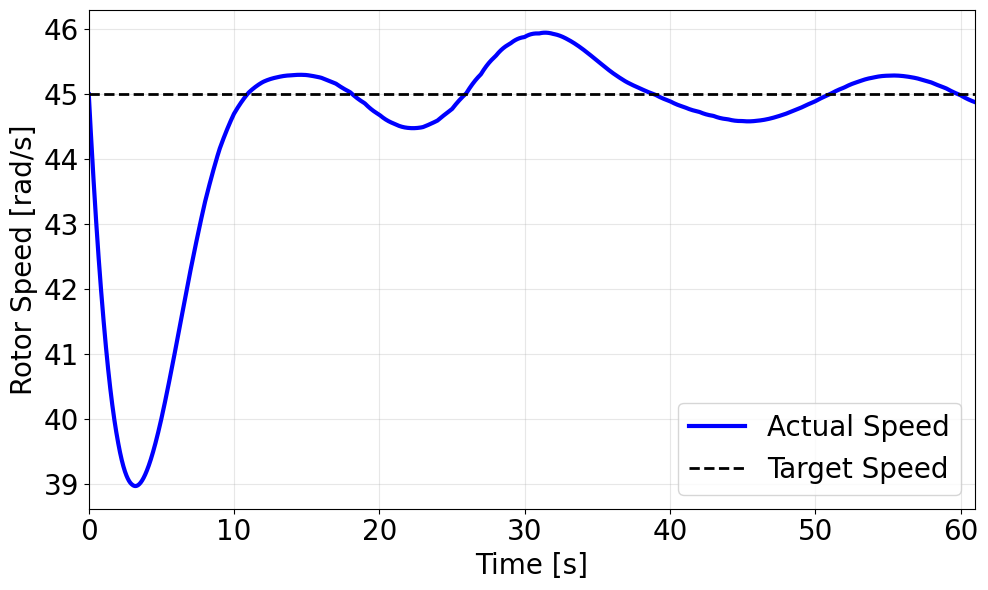

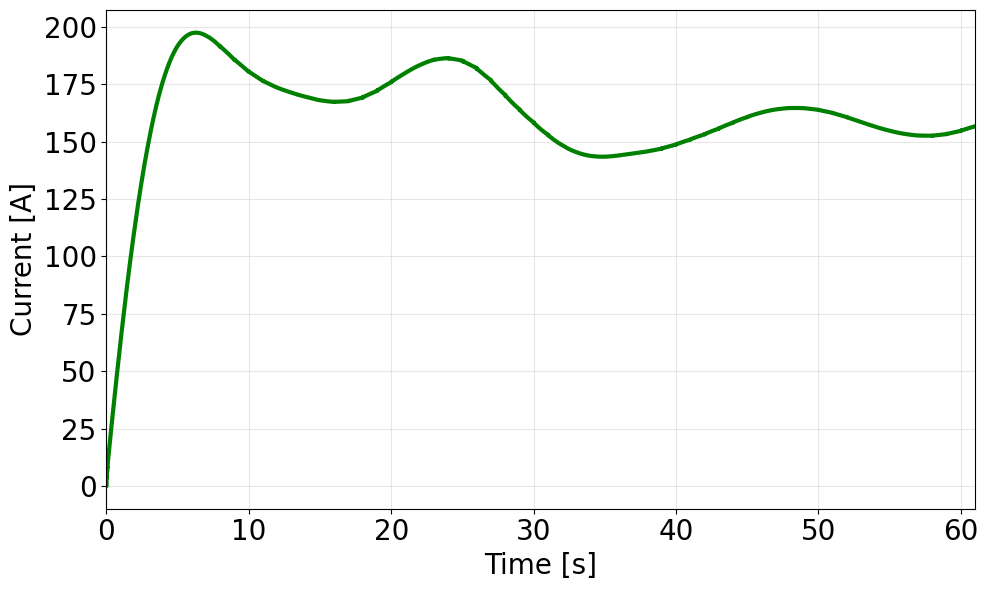

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load torque data ===
torque_df = pd.read_csv('torque_data.csv')
torque_z = torque_df['torque_z'].values  # Q_aero values at 1 Hz

# === Simulation Setup ===
dt = 0.01
steps_per_second = int(1 / dt)
sim_time = len(torque_z)
n_steps = sim_time * steps_per_second
time_array = np.arange(0, sim_time, dt)

# === Expand Q_aero for full time resolution ===
Q_aero_full = np.repeat(torque_z, steps_per_second)[:n_steps]

# === Constants ===
J_rot = 0.064         # kg·m²
I_r = 274.69          # kg·m²
r = 18.75             # Gear ratio
L = 0.3e-3            # H
R = 0.05              # Ohm
K_Q = 0.463           # Nm/A
K_V = 0.463           # V·s/rad
total_inertia = J_rot * r**2 + I_r

# === Desired Rotor Speed ===
Omega_desired = 45.0  # rad/s

# === Initialize states ===
Omega = np.zeros(n_steps)
omega = np.zeros(n_steps)
i_vals = np.zeros(n_steps)
v_vals = np.zeros(n_steps)
Q_m_vals = np.zeros(n_steps)
v_m_vals = np.zeros(n_steps)
Omega[0] = 45.0  # Initialize rotor speed to 45 rad/s

# === Control Gains ===
Kp = 15.0     # Proportional gain
Ki = 5.0      # Integral gain
Kd = 1.0      # Derivative gain
integral_error = 0  # Initialize integral term
previous_error = 0.0  # Initialize previous error for derivative term

# === Simulation Loop ===
for t in range(1, n_steps):
    # Feedback: rotor speed error
    error = Omega_desired - Omega[t - 1]
    
    # Update integral term
    integral_error += error * dt
    
    # Anti-windup: limit integral term
    integral_error = np.clip(integral_error, -50, 50)
    
    # Derivative term (difference of current error and previous error)
    derivative_error = (error - previous_error) / dt
    
    # PID controller to compute desired current
    i_desired = Kp * error + Ki * integral_error + Kd * derivative_error
    
    # Total desired current (no feedforward)
    i_total = i_desired
    
    # Limit current (optional safety)
    i_total = np.clip(i_total, -300, 300)
    
    # Motor torque from current
    Q_m = r * i_total * K_Q
    
    # Rotor dynamics
    dOmega_dt = (Q_m + Q_aero_full[t]) / total_inertia
    Omega[t] = Omega[t - 1] + dOmega_dt * dt
    
    # Motor shaft speed
    omega[t] = r * Omega[t]
    
    # Electrical dynamics (first-order response)
    tau_e = L/R  # Electrical time constant
    di_dt = (i_total - i_vals[t - 1]) / tau_e
    i_vals[t] = i_vals[t - 1] + di_dt * dt
    
    # Back EMF and voltage
    v_m = omega[t] * K_V
    v = v_m + i_vals[t] * R
    
    # For plotting: include inductive term
    v_inductive = L * (i_vals[t] - i_vals[t-1]) / dt
    v_total = v_m + i_vals[t] * R + v_inductive
    
    # Save values
    Q_m_vals[t] = Q_m
    v_m_vals[t] = v_m
    v_vals[t] = v_total
    
    # Update previous error for derivative calculation
    previous_error = error
    
    # LOG DATA at specific intervals (every 1 second)
    if t % steps_per_second == 0:
        time_sec = t / steps_per_second
        print(f"t={time_sec:.1f}s: I={i_vals[t]:.2f}A, V={v_vals[t]:.2f}V, Ω={Omega[t]:.4f}rad/s, Q_aero={Q_aero_full[t]:.1f}Nm, Q_motor={Q_m_vals[t]:.1f}Nm")

# === Log summary at key time points ===
print("\n=== DETAILED LOG AT KEY POINTS ===")
key_times = [0, 5, 10, 20, 30, 50, 60]  # seconds
for t_sec in key_times:
    if t_sec < sim_time:
        idx = int(t_sec * steps_per_second)
        print(f"\nTime: {t_sec} seconds")
        print(f"  Rotor Speed (Ω): {Omega[idx]:.4f} rad/s")
        print(f"  Motor Current (i): {i_vals[idx]:.2f} A")
        print(f"  Motor Voltage (v): {v_vals[idx]:.2f} V")
        print(f"  Back EMF (v_m): {v_m_vals[idx]:.2f} V")
        print(f"  Aero Torque: {Q_aero_full[idx]:.1f} Nm")
        print(f"  Motor Torque: {Q_m_vals[idx]:.1f} Nm")
        print(f"  Speed Error: {Omega_desired - Omega[idx]:.4f} rad/s")

# === Create log file ===
log_data = []
for t in range(0, n_steps, steps_per_second):  # Every second
    log_data.append({
        'Time_s': t/steps_per_second,
        'Current_A': i_vals[t],
        'Voltage_V': v_vals[t],
        'RotorSpeed_rads': Omega[t],
        'AeroTorque_Nm': Q_aero_full[t],
        'MotorTorque_Nm': Q_m_vals[t],
        'SpeedError_rads': Omega_desired - Omega[t]
    })

log_df = pd.DataFrame(log_data)
log_df.to_csv('motor_simulation_log.csv', index=False)
print(f"\n=== Simulation data saved to 'motor_simulation_log.csv' ===")

# === Create separate plots ===

# Plot 1: Rotor Speed
plt.figure(figsize=(10, 6))
plt.plot(time_array, Omega, 'b-', linewidth=3, label='Actual Speed')
plt.axhline(Omega_desired, color='black', linestyle='--', linewidth=2, label='Target Speed')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Rotor Speed [rad/s]', fontsize=20)
plt.xticks(fontsize=20)  # Larger x-axis tick labels
plt.yticks(fontsize=20)  # Larger y-axis tick labels
plt.legend(fontsize=20)  # Larger legend font
plt.grid(True, alpha=0.3)
plt.margins(x=0)  # Remove whitespace on x-axis
plt.tight_layout()
plt.show()

# Plot 3: Motor Current
plt.figure(figsize=(10, 6))
plt.plot(time_array, i_vals, 'g-', linewidth=3)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Current [A]', fontsize=20)
plt.xticks(fontsize=20)  # Larger x-axis tick labels
plt.yticks(fontsize=20)  # Larger y-axis tick labels
plt.grid(True, alpha=0.3)
plt.margins(x=0)  # Remove whitespace on x-axis
plt.tight_layout()
plt.show()

C:\Users\Aero\AppData\Local\Temp\ipykernel_14440\1097105597.py:47: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, alpha=0.3)


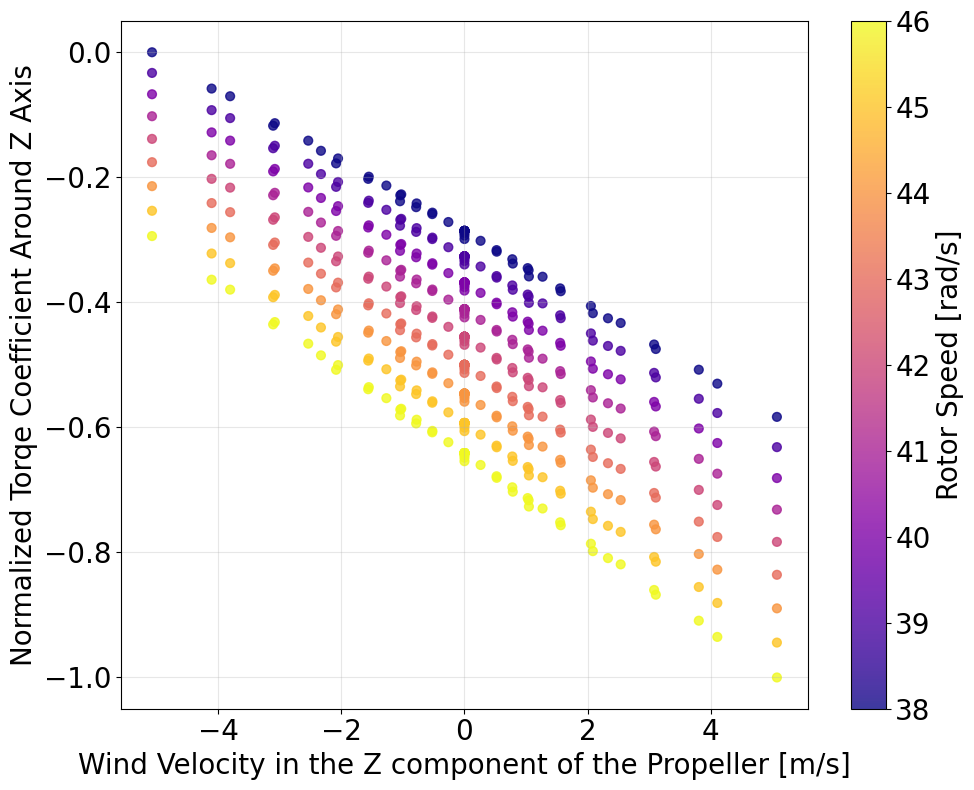

=== Data Summary ===
Normalization factor: rho*n^2*D^5 = 11534430.28
  rho = 1.0178
  n = 45
  D = 5.618

Wind Magnitude range: -5.071 to 5.071
Original Propeller_1_Qz range: -1907.2 to -616.7
Normalized Propeller_1_Qz range: -0.000165 to -0.000053
Scaled Propeller_1_Qz range: -1.000000 to 0.000000
RPM range: 38 to 46
Number of data points: 495


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('rpm_wind_simulation_results_correct_3.csv')

# Extract the relevant columns
rpm = df['RPM'].values
wind_magnitude = df['WindZ'].values
propeller_qz = df['Propeller_1_Qz'].values

# Define normalization parameters
rho = 1.0178  # density
n = 45  # rotational speed (based on your values)
D = 2.809 * 2  # diameter

# Calculate normalization factor: rho * n^2 * D^5
normalization_factor = rho * n**2 * D**5

# Normalize Propeller_1_Qz
propeller_qz_normalized = propeller_qz / normalization_factor

# Scale the normalized values between -1 and 1
propeller_qz_min = propeller_qz_normalized.min()
propeller_qz_max = propeller_qz_normalized.max()
propeller_qz_scaled = (propeller_qz_normalized - propeller_qz_normalized.max()) / (propeller_qz_normalized.max() - propeller_qz_normalized.min())

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Create scatter plot with Wind Magnitude on x-axis, scaled Qz on y-axis, colored by RPM
scatter = ax.scatter(wind_magnitude, propeller_qz_scaled, c=rpm, cmap='plasma', s=40, alpha=0.8)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax, label='RPM')
cbar.ax.tick_params(labelsize=20)
cbar.set_label('Rotor Speed [rad/s]', fontsize=20)

# Set labels and title
ax.set_xlabel('Wind Velocity in the Z component of the Propeller [m/s]', fontsize=20)
ax.set_ylabel('Normalized Torqe Coefficient Around Z Axis', fontsize=20)
plt.xticks(fontsize=20)  # Larger x-axis tick labels
plt.yticks(fontsize=20)  # Larger y-axis tick labels

# Add grid
ax.grid(False, alpha=0.3)

# Increase tick label size
ax.tick_params(axis='both', which='major', labelsize=20)

# Tight layout
plt.tight_layout()
plt.show()

# Print some information about the data
print("=== Data Summary ===")
print(f"Normalization factor: rho*n^2*D^5 = {normalization_factor:.2f}")
print(f"  rho = {rho}")
print(f"  n = {n}")
print(f"  D = {D}")
print(f"")
print(f"Wind Magnitude range: {wind_magnitude.min():.3f} to {wind_magnitude.max():.3f}")
print(f"Original Propeller_1_Qz range: {propeller_qz.min():.1f} to {propeller_qz.max():.1f}")
print(f"Normalized Propeller_1_Qz range: {propeller_qz_normalized.min():.6f} to {propeller_qz_normalized.max():.6f}")
print(f"Scaled Propeller_1_Qz range: {propeller_qz_scaled.min():.6f} to {propeller_qz_scaled.max():.6f}")
print(f"RPM range: {rpm.min():.0f} to {rpm.max():.0f}")
print(f"Number of data points: {len(df)}")



t=1.0s: I=63.22A, V=363.99V, Ω=41.5627rad/s, Q_aero=-1340.3Nm, Q_motor=547.0Nm
t=2.0s: I=113.06A, V=349.95V, Ω=39.6588rad/s, Q_aero=-1356.7Nm, Q_motor=980.0Nm
t=3.0s: I=151.06A, V=346.00V, Ω=38.9845rad/s, Q_aero=-1367.6Nm, Q_motor=1310.3Nm
t=4.0s: I=176.95A, V=349.20V, Ω=39.2045rad/s, Q_aero=-1369.7Nm, Q_motor=1535.5Nm
t=5.0s: I=191.71A, V=356.89V, Ω=40.0056rad/s, Q_aero=-1365.4Nm, Q_motor=1663.9Nm
t=6.0s: I=197.25A, V=366.76V, Ω=41.1110rad/s, Q_aero=-1362.3Nm, Q_motor=1712.3Nm
t=7.0s: I=196.15A, V=376.89V, Ω=42.2852rad/s, Q_aero=-1370.7Nm, Q_motor=1702.9Nm
t=8.0s: I=191.36A, V=385.81V, Ω=43.3395rad/s, Q_aero=-1395.6Nm, Q_motor=1661.4Nm
t=9.0s: I=185.59A, V=392.58V, Ω=44.1527rad/s, Q_aero=-1426.7Nm, Q_motor=1611.3Nm
t=10.0s: I=180.43A, V=397.07V, Ω=44.6995rad/s, Q_aero=-1453.0Nm, Q_motor=1566.5Nm
t=11.0s: I=176.42A, V=399.67V, Ω=45.0225rad/s, Q_aero=-1469.3Nm, Q_motor=1531.7Nm
t=12.0s: I=173.50A, V=400.97V, Ω=45.1886rad/s, Q_aero=-1475.2Nm, Q_motor=1506.3Nm
t=13.0s: I=171.35A, V=401.48

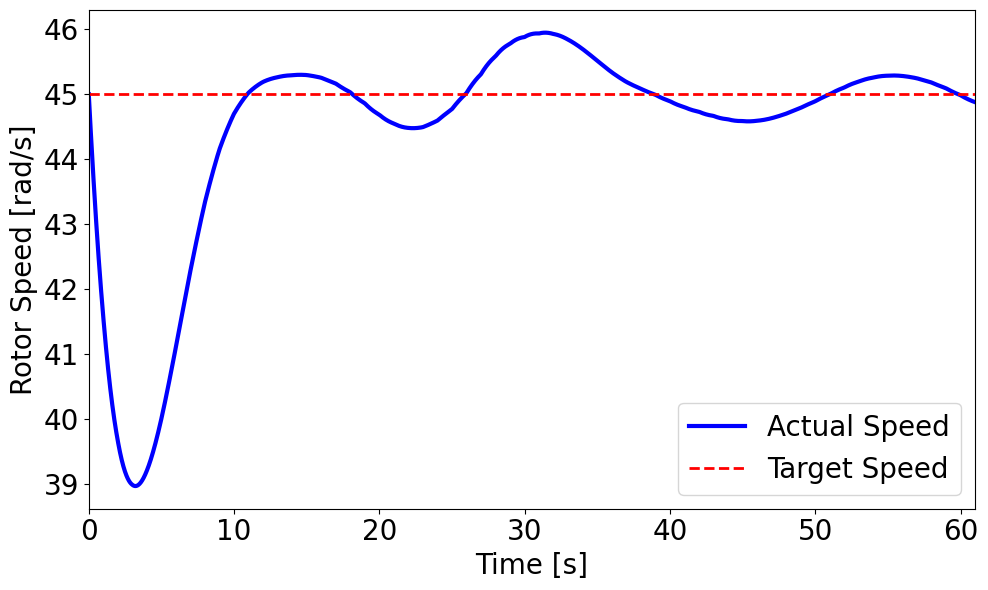

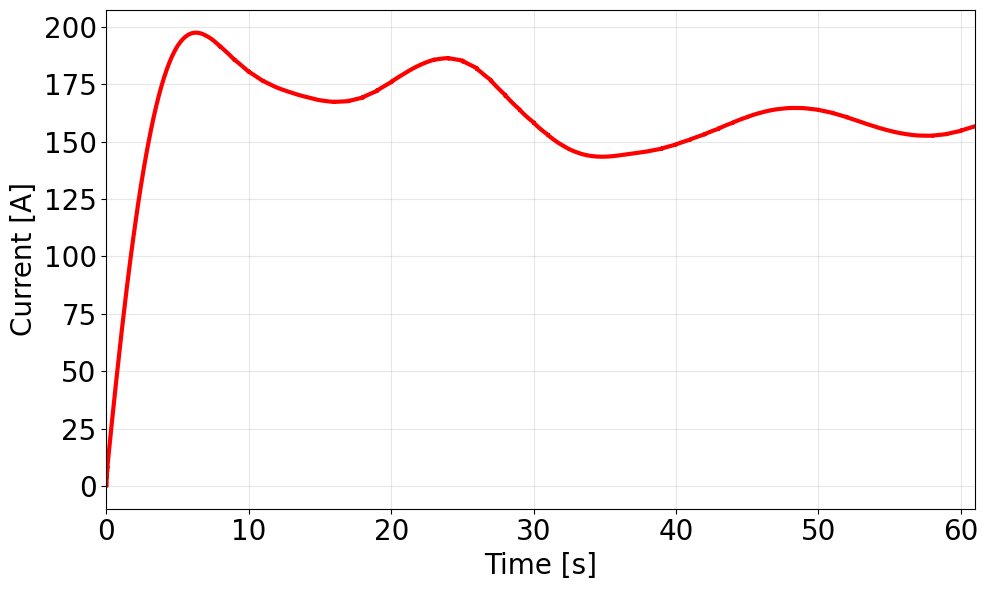

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Load torque data ===
torque_df = pd.read_csv('motor_simulation_log.csv')
torque_z = torque_df['AeroTorque_Nm'].values  # Q_aero values at 1 Hz

# === Simulation Setup ===
dt = 0.01
steps_per_second = int(1 / dt)
sim_time = len(torque_z)
n_steps = sim_time * steps_per_second
time_array = np.arange(0, sim_time, dt)

# === Expand Q_aero for full time resolution ===
Q_aero_full = np.repeat(torque_z, steps_per_second)[:n_steps]

# === Constants ===
J_rot = 0.064         # kg·m²
I_r = 274.69          # kg·m²
r = 18.75             # Gear ratio
L = 0.3e-3            # H
R = 0.05              # Ohm
K_Q = 0.463           # Nm/A
K_V = 0.463           # V·s/rad
total_inertia = J_rot * r**2 + I_r

# === Desired Rotor Speed ===
Omega_desired = 45.0  # rad/s

# === Initialize states ===
Omega = np.zeros(n_steps)
omega = np.zeros(n_steps)
i_vals = np.zeros(n_steps)
v_vals = np.zeros(n_steps)
Q_m_vals = np.zeros(n_steps)
v_m_vals = np.zeros(n_steps)
Omega[0] = 45.0  # Initialize rotor speed to 45 rad/s

# === Control Gains ===
Kp = 15.0     # Proportional gain
Ki = 5.0      # Integral gain
Kd = 1.0      # Derivative gain
integral_error = 0  # Initialize integral term
previous_error = 0.0  # Initialize previous error for derivative term

# === Simulation Loop ===
for t in range(1, n_steps):
    # Feedback: rotor speed error
    error = Omega_desired - Omega[t - 1]
    
    # Update integral term
    integral_error += error * dt
    
    # Anti-windup: limit integral term
    integral_error = np.clip(integral_error, -50, 50)
    
    # Derivative term (difference of current error and previous error)
    derivative_error = (error - previous_error) / dt
    
    # PID controller to compute desired current
    i_desired = Kp * error + Ki * integral_error + Kd * derivative_error
    
    # Total desired current (no feedforward)
    i_total = i_desired
    
    # Limit current (optional safety)
    i_total = np.clip(i_total, -300, 300)
    
    # Motor torque from current
    Q_m = r * i_total * K_Q
    
    # Rotor dynamics
    dOmega_dt = (Q_m + Q_aero_full[t]) / total_inertia
    Omega[t] = Omega[t - 1] + dOmega_dt * dt
    
    # Motor shaft speed
    omega[t] = r * Omega[t]
    
    # Electrical dynamics (first-order response)
    tau_e = L/R  # Electrical time constant
    di_dt = (i_total - i_vals[t - 1]) / tau_e
    i_vals[t] = i_vals[t - 1] + di_dt * dt
    
    # Back EMF and voltage
    v_m = omega[t] * K_V
    v = v_m + i_vals[t] * R
    
    # For plotting: include inductive term
    v_inductive = L * (i_vals[t] - i_vals[t-1]) / dt
    v_total = v_m + i_vals[t] * R + v_inductive
    
    # Save values
    Q_m_vals[t] = Q_m
    v_m_vals[t] = v_m
    v_vals[t] = v_total
    
    # Update previous error for derivative calculation
    previous_error = error
    
    # LOG DATA at specific intervals (every 1 second)
    if t % steps_per_second == 0:
        time_sec = t / steps_per_second
        print(f"t={time_sec:.1f}s: I={i_vals[t]:.2f}A, V={v_vals[t]:.2f}V, Ω={Omega[t]:.4f}rad/s, Q_aero={Q_aero_full[t]:.1f}Nm, Q_motor={Q_m_vals[t]:.1f}Nm")

# === Log summary at key time points ===
print("\n=== DETAILED LOG AT KEY POINTS ===")
key_times = [0, 5, 10, 20, 30, 50, 60]  # seconds
for t_sec in key_times:
    if t_sec < sim_time:
        idx = int(t_sec * steps_per_second)
        print(f"\nTime: {t_sec} seconds")
        print(f"  Rotor Speed (Ω): {Omega[idx]:.4f} rad/s")
        print(f"  Motor Current (i): {i_vals[idx]:.2f} A")
        print(f"  Motor Voltage (v): {v_vals[idx]:.2f} V")
        print(f"  Back EMF (v_m): {v_m_vals[idx]:.2f} V")
        print(f"  Aero Torque: {Q_aero_full[idx]:.1f} Nm")
        print(f"  Motor Torque: {Q_m_vals[idx]:.1f} Nm")
        print(f"  Speed Error: {Omega_desired - Omega[idx]:.4f} rad/s")

# === Create log file ===
log_data = []
for t in range(0, n_steps, steps_per_second):  # Every second
    log_data.append({
        'Time_s': t/steps_per_second,
        'Current_A': i_vals[t],
        'Voltage_V': v_vals[t],
        'RotorSpeed_rads': Omega[t],
        'AeroTorque_Nm': Q_aero_full[t],
        'MotorTorque_Nm': Q_m_vals[t],
        'SpeedError_rads': Omega_desired - Omega[t]
    })

log_df = pd.DataFrame(log_data)
log_df.to_csv('motor_simulation_log.csv', index=False)
print(f"\n=== Simulation data saved to 'motor_simulation_log.csv' ===")

# === Create separate plots ===

# Plot 1: Rotor Speed
plt.figure(figsize=(10, 6))
plt.plot(time_array, Omega, 'b-', linewidth=3, label='Actual Speed')
plt.axhline(Omega_desired, color='r', linestyle='--', linewidth=2, label='Target Speed')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Rotor Speed [rad/s]', fontsize=20)
plt.xticks(fontsize=20)  # Larger x-axis tick labels
plt.yticks(fontsize=20)  # Larger y-axis tick labels
plt.legend(fontsize=20)  # Larger legend font
plt.grid(False, alpha=0.3)
plt.margins(x=0)  # Remove whitespace on x-axis
plt.tight_layout()
plt.show()

# Plot 3: Motor Current
plt.figure(figsize=(10, 6))
plt.plot(time_array, i_vals, 'r-', linewidth=3)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Current [A]', fontsize=20)
plt.xticks(fontsize=20)  # Larger x-axis tick labels
plt.yticks(fontsize=20)  # Larger y-axis tick labels
plt.grid(True, alpha=0.3)
plt.margins(x=0)  # Remove whitespace on x-axis
plt.tight_layout()
plt.show()

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read the CSV file
df = pd.read_csv('rpm_wind_simulation_results_correct_3.csv')

# Extract the input (features) and output (target)
X = df[['RPM', 'Propeller_1_Qz']].values          # Independent variables
y = df['WindZ'].values         # Dependent variable

# Choose polynomial degree
degree = 3  # You can try 3, 4, etc. for more complexity

# Generate polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Evaluate the fit
r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.4f}")

# Get the names of the polynomial terms
feature_names = poly.get_feature_names_out(['RPM', 'Propeller_1_Qz'])

# Construct the polynomial equation
equation = "y = " + f"{model.intercept_:.6f}"  # Start with the intercept term
for name, coef in zip(feature_names[1:], model.coef_[1:]):  # Skip the first term as it's the intercept
    equation += f" + ({coef:.6f}) * {name}"

# Print the polynomial equation
print(f"Polynomial Equation: {equation}")


R² score: 0.9991
Polynomial Equation: y = 13.195318 + (-1.237085) * RPM + (-0.033724) * Propeller_1_Qz + (0.019313) * RPM^2 + (0.000680) * RPM Propeller_1_Qz + (-0.000001) * Propeller_1_Qz^2 + (-0.000149) * RPM^3 + (-0.000005) * RPM^2 Propeller_1_Qz + (0.000000) * RPM Propeller_1_Qz^2 + (-0.000000) * Propeller_1_Qz^3


    RotorSpeed_rads  AeroTorque_Nm  Predicted_WindZ
0         45.000000   -1319.341251        -0.756738
1         41.562736   -1340.282999         1.926183
2         39.658791   -1356.674148         3.561014
3         38.984535   -1367.570669         4.223056
4         39.204463   -1369.735982         4.078523
..              ...            ...              ...
56        45.279416   -1338.981527        -0.724646
57        45.243559   -1344.097735        -0.642032
58        45.178799   -1353.982853        -0.485339
59        45.090144   -1368.906833        -0.254668
60        44.983070   -1383.858351        -0.010394

[61 rows x 3 columns]


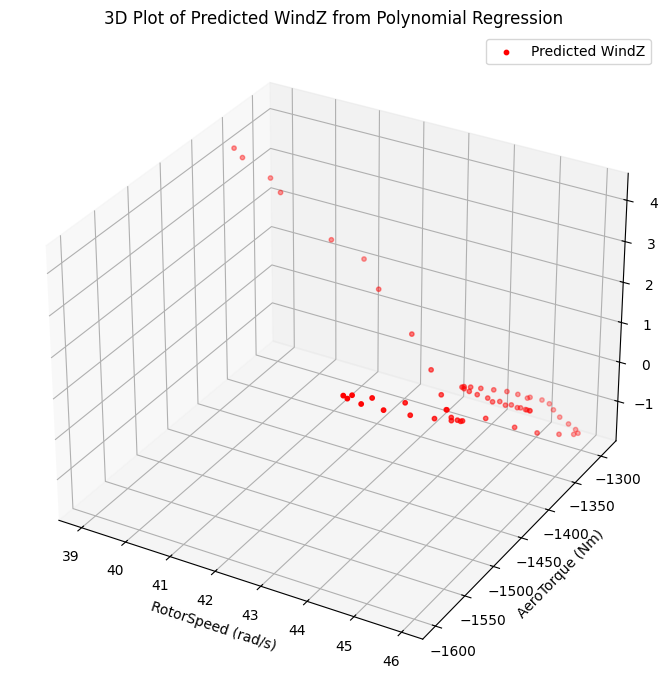

In [58]:
import pandas as pd
import numpy as np

# Load the new motor_simulation_log.csv
df_log = pd.read_csv('motor_simulation_log.csv')

# Extract RotorSpeed_rads and AeroTorque_Nm columns
X_log = df_log[['RotorSpeed_rads', 'AeroTorque_Nm']].values

# Transform the extracted features using the same PolynomialFeatures
X_log_poly = poly.transform(X_log)

# Predict the WindZ (y) using the trained model
y_log_pred = model.predict(X_log_poly)

# Print the predicted WindZ values (y)
df_log['Predicted_WindZ'] = y_log_pred
print(df_log[['RotorSpeed_rads', 'AeroTorque_Nm', 'Predicted_WindZ']])
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming df_log contains the 'Predicted_WindZ' column as in the previous code

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original data (actual) - you can plot these in red to distinguish them
ax.scatter(df_log['RotorSpeed_rads'], df_log['AeroTorque_Nm'], df_log['Predicted_WindZ'], color='red', label='Predicted WindZ', s=10)

# Set labels and title
ax.set_xlabel('RotorSpeed (rad/s)')
ax.set_ylabel('AeroTorque (Nm)')
ax.set_zlabel('Predicted WindZ')
ax.set_title('3D Plot of Predicted WindZ from Polynomial Regression')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()



In [59]:
import pandas as pd
import numpy as np

# Assuming df_log already contains the 'RotorSpeed_rads', 'AeroTorque_Nm', and 'Predicted_WindZ' columns
# Save the dataframe with the predictions to a CSV
df_log[['RotorSpeed_rads', 'AeroTorque_Nm', 'Predicted_WindZ']].to_csv('predicted_windz.csv', index=False)

print("Predicted WindZ values have been saved to 'predicted_windz.csv'.")


Predicted WindZ values have been saved to 'predicted_windz.csv'.


In [51]:
import pandas as pd

# Load the CSV files
prop1_df = pd.read_csv('Propeller_1_wind_velocities.csv')
prop2_df = pd.read_csv('Propeller_2_wind_velocities.csv')

# Extract the wind_velocity_z columns
wind_velocity_z_1 = prop1_df['wind_velocity_z']
wind_velocity_z_2 = prop2_df['wind_velocity_z']

# Compute the difference in wind velocities
velocity_difference = wind_velocity_z_2 - wind_velocity_z_1

# Placeholder for the distance between the two propellers
DISTANCE = 1.0  # <-- Replace this with the actual distance

# Compute the constant (rate of change per unit distance)
some_constant = velocity_difference / DISTANCE

# Optionally, print or store the result
print("Some constant (wind velocity gradient):")
print(some_constant)


Some constant (wind velocity gradient):
0    -0.576280
1    -0.554303
2    -0.378995
3    -0.034148
4     0.389655
        ...   
56    1.265139
57    1.216641
58    1.139540
59    1.052351
60    0.962873
Name: wind_velocity_z, Length: 61, dtype: float64
